In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/german.csv"
)

df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [ ]:
df.shape

(1000, 21)

Antes de solucionar, ordenar la variable y y label a todas las demas



In [ ]:
# Convertir 0-1 la variable y
import numpy as np
df['default'] = np.where((df['default'] == 2), 1, 0)

# Otra forma de hacer los remplazos
# df['default'] = df['default'].replace(1,0)
# df['default'] = df['default'].replace(2,1)

df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,0,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,1,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,0,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,0,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,1,2,none,yes,skilled employee


In [ ]:
# separar los datos en X y y
y = df.loc[:,['default']]
X = df.drop(['default'], axis = 1)

In [ ]:
# Seleccionar las variables para el Label encoding

objList = X.select_dtypes(include = "object").columns
print (objList)


Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_length', 'personal_status', 'other_debtors', 'property',
       'installment_plan', 'housing', 'telephone', 'foreign_worker', 'job'],
      dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
le = LabelEncoder()

for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))

X

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,dependents,telephone,foreign_worker,job
0,1,6,0,7,1169,4,3,4,3,2,4,2,67,1,1,2,1,1,1,1
1,0,48,4,7,5951,2,1,2,1,2,2,2,22,1,1,1,1,0,1,1
2,3,12,0,4,2096,2,2,2,3,2,3,2,49,1,1,1,2,0,1,3
3,1,42,4,5,7882,2,2,2,3,1,4,0,45,1,0,1,2,0,1,1
4,1,24,1,1,4870,2,1,3,3,2,4,3,53,1,0,2,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,4,5,1736,2,2,3,1,2,4,2,31,1,1,1,1,0,1,3
996,1,30,4,2,3857,2,1,4,0,2,4,0,40,1,1,1,1,1,1,0
997,3,12,4,7,804,2,3,4,3,2,4,1,38,1,1,1,1,0,1,1
998,1,45,4,7,1845,2,1,4,3,2,4,3,23,1,0,1,1,1,1,1


# Ejercicio 1 -  SVM con los parametros por defecto

In [ ]:
X_train = X[0:900]
X_test = X[900:]

y_train = y.default[0:900]
y_test = y.default[900:]

In [ ]:
# Ajuste modelo
model = SVC(probability=True)  
model.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred  = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Matriz de confusion
cm = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    labels=None,
    normalize=None,
)

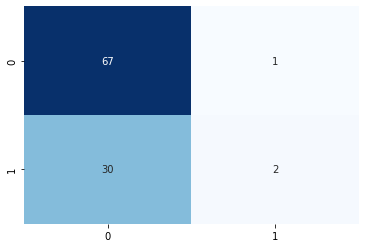

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.heatmap(
    cm,
    cbar=False,
    cmap="Blues",
    annot=True,
    fmt="d",
)
plt.show()

In [ ]:
# # ---->>> Evaluación ---->>>
# # cm es la matriz de confusion
# print(cm[0][0] == 67)
# print(cm[0][1] == 1)
# print(cm[1][0] == 30)
# print(cm[1][1] == 2)

# Ejercicio 2 -  SVM eligiendo el mejor kernel y el mejor C

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining parameter range
param_grid = {'C': [1, 2, 3, 4, 5],   #0.1, 0.5, 0.8, 0.9, 
              'kernel': ['rbf','poly', 'sigmoid']}  #'linear'

In [ ]:
grid = GridSearchCV(SVC(), param_grid, n_jobs=-1, refit = True, verbose = False, scoring = 'precision')  # mejor fue precision  no funcionaron accuracy, recall, f1

In [ ]:
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='precision', verbose=False)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
# Matriz de confusion
cm = confusion_matrix(
    y_true=y_test,
    y_pred=grid_predictions,
    labels=None,
    normalize=None,
)

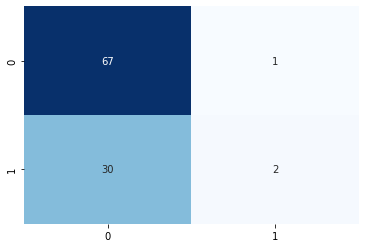

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.heatmap(
    cm,
    cbar=False,
    cmap="Blues",
    annot=True,
    fmt="d",
)
plt.show()

In [ ]:
# cm es la matriz de confusion
print(cm[0][0] == 68)
print(cm[0][1] == 0)
print(cm[1][0] == 30)
print(cm[1][1] == 2)

False
False
True
True
